In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from PIL import Image
import os
import time
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# Directory
root = "images"
dir1 = "left"
dir2 = "right"

# Parent Directory path
parent_dir = "/content/"
parent_dir_img = "/content/images"

# Path
path = os.path.join(parent_dir, root)

try:
    os.makedirs(path, exist_ok = True)
    print("Directory '%s' created successfully" % root)
except OSError as error:
    print("Directory '%s' can not be created" % root)

# Path
path1 = os.path.join(parent_dir_img, dir1)
path2 = os.path.join(parent_dir_img, dir2)

try:
    os.makedirs(path1, exist_ok = True)
    os.makedirs(path2, exist_ok = True)
    print("Directory '{}' and '{}' created successfully".format(dir1, dir2))
except OSError as error:
    print("Directory '{}' and '{}' can not be created".format(dir1, dir2))

Directory 'images' created successfully
Directory 'left' and 'right' created successfully


In [ ]:
def print_matrix(stext,demomat):
  print(stext+": \n")

  for row in demomat:
    for item in row:
      print(item,end=" ")
    print()
  print("")

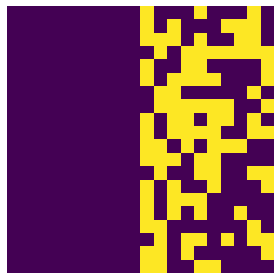

In [ ]:
image_count= 500

# For Left-side values
for i in range(image_count):
  lmat1 = np.random.randint(2,size=(20,10))
  lmat2 = np.uint8(np.zeros((20,20)))
  lmat2[:,:10] = lmat2[:,:10] + lmat1
  #print_matrix("matrix_"+str(i)+": ",lmat2)
  plt.imshow(lmat2)
  plt.tight_layout()
  plt.axis('off') 
  #lmat2 = lmat2.resize((224,224))
  filename = "left_"+str(i+1)+".jpg"
  plt.savefig('/content/images/left/'+filename, bbox_inches='tight',pad_inches = 0)
  #plt.show()

# For Right-side values
for i in range(image_count):
  rmat1 = np.random.randint(2,size=(20,10))
  rmat2 = np.uint8(np.zeros((20,20)))
  rmat2[:,10:] = rmat2[:,10:] + rmat1
  #print_matrix("matrix_"+str(i)+": ",rmat2)
  plt.imshow(rmat2)
  plt.tight_layout()
  plt.axis('off') 
  #lmat2 = rmat2.resize((224,224))
  filename = "right_"+str(i+1)+".jpg"
  plt.savefig('/content/images/right/'+filename, bbox_inches='tight',pad_inches = 0)
  #plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!zip -uq /content/imageslr.zip /content/images
!mv /content/imageslr.zip /content/drive/MyDrive/

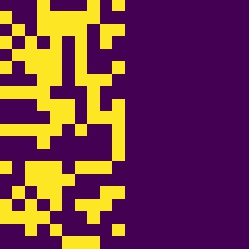

(249, 249, 3)
(249, 249, 3)


In [ ]:
im2 = cv2.imread("/content/file.jpg")
cv2_imshow(im2)
print(im2.shape)
# resize image
resized = cv2.resize(im2, (224,224), interpolation = cv2.INTER_AREA)
print(im2.shape)

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

In [ ]:
data_dir = '/content/images'
from torch.utils.data.sampler import SubsetRandomSampler

def load_split_train_test(datadir, valid_size = .2):
    train_transforms = transforms.Compose([transforms.Resize(224),
                                       transforms.ToTensor(),
                                       ])
    test_transforms = transforms.Compose([transforms.Resize(224),
                                      transforms.ToTensor(),
                                      ])
    
    train_data = datasets.ImageFolder(datadir,       
                    transform=train_transforms)
    test_data = datasets.ImageFolder(datadir,
                    transform=test_transforms)
    
    num_train = len(train_data)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))
    np.random.shuffle(indices)

    train_idx, test_idx = indices[split:], indices[:split]
    train_sampler = SubsetRandomSampler(train_idx)
    test_sampler = SubsetRandomSampler(test_idx)
    trainloader = torch.utils.data.DataLoader(train_data,
                   sampler=train_sampler, batch_size=64)
    testloader = torch.utils.data.DataLoader(test_data,
                   sampler=test_sampler, batch_size=64)
    
    return trainloader, testloader

trainloader, testloader = load_split_train_test(data_dir, .2)
print(trainloader.dataset.classes)

['left', 'right']


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
model = models.resnet50(pretrained=True)
print(model)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
for param in model.parameters():
    param.requires_grad = False
    
model.fc = nn.Sequential(nn.Linear(2048, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(512, 10),
                                 nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.003)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
epochs = 10
steps = 0
running_loss = 0
print_every = 10
train_losses, test_losses = [], []

for epoch in range(epochs):
    for inputs, labels in trainloader:
        steps += 1
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in testloader:
                    inputs, labels = inputs.to(device),labels.to(device)
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    test_loss += batch_loss.item()
                    
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
            train_losses.append(running_loss/len(trainloader))
            test_losses.append(test_loss/len(testloader))                    
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(testloader):.3f}.. "
                  f"Test accuracy: {accuracy/len(testloader):.3f}")
            running_loss = 0
            model.train()

torch.save(model, 'left-right.pth')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch 1/10.. Train loss: 2.330.. Test loss: 1.330.. Test accuracy: 0.488
Epoch 2/10.. Train loss: 0.491.. Test loss: 1.340.. Test accuracy: 0.461
Epoch 3/10.. Train loss: 0.079.. Test loss: 3.167.. Test accuracy: 0.516
Epoch 4/10.. Train loss: 0.035.. Test loss: 2.098.. Test accuracy: 0.516
Epoch 4/10.. Train loss: 0.016.. Test loss: 1.353.. Test accuracy: 0.488
Epoch 5/10.. Train loss: 0.014.. Test loss: 1.229.. Test accuracy: 0.480
Epoch 6/10.. Train loss: 0.012.. Test loss: 0.018.. Test accuracy: 1.000
Epoch 7/10.. Train loss: 0.011.. Test loss: 0.027.. Test accuracy: 0.996
Epoch 7/10.. Train loss: 0.015.. Test loss: 0.008.. Test accuracy: 1.000
Epoch 8/10.. Train loss: 0.013.. Test loss: 0.004.. Test accuracy: 1.000
Epoch 9/10.. Train loss: 0.004.. Test loss: 0.009.. Test accuracy: 1.000
Epoch 10/10.. Train loss: 0.007.. Test loss: 0.003.. Test accuracy: 1.000
Epoch 10/10.. Train loss: 0.006.. Test loss: 0.004.. Test accuracy: 1.000


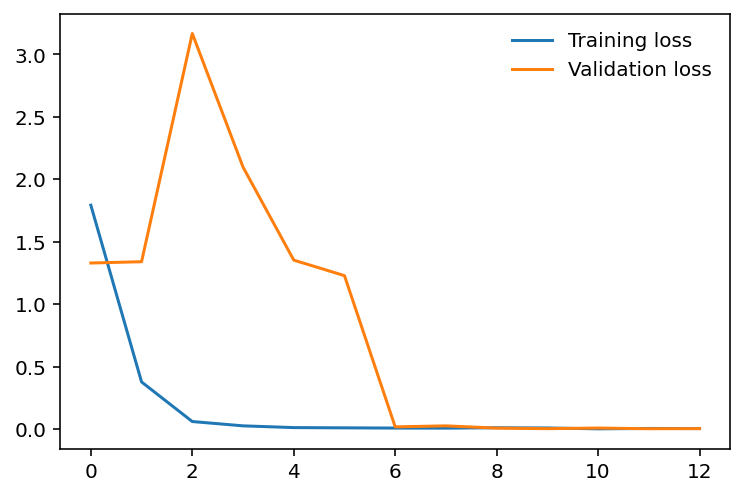

In [ ]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

In [ ]:
data_dir = '/content/images'
test_transforms = transforms.Compose([transforms.Resize(224),
                                      transforms.ToTensor(),
                                     ])

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=torch.load('left-right.pth')
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
from torch.autograd import Variable

def predict_image(image):
    image_tensor = test_transforms(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input = Variable(image_tensor)
    input = input.to(device)
    output = model(input)
    index = output.data.cpu().numpy().argmax()
    
    return index

In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler

def get_random_images(num):
    data = datasets.ImageFolder(data_dir, transform=test_transforms)
    classes = data.classes
    indices = list(range(len(data)))
    np.random.shuffle(indices)
    idx = indices[:num]

    sampler = SubsetRandomSampler(idx)
    loader = torch.utils.data.DataLoader(data, 
                   sampler=sampler, batch_size=num)
    dataiter = iter(loader)
    images, labels = dataiter.next()
    return images, labels

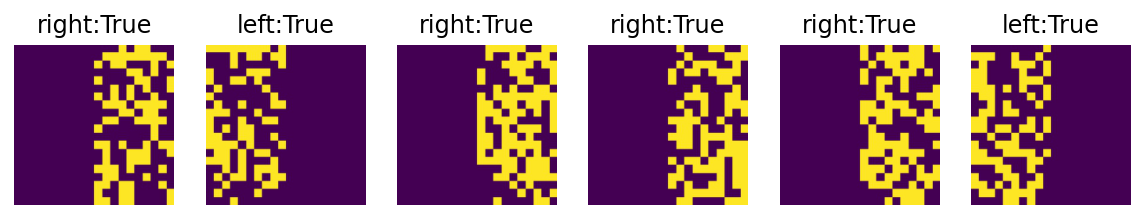

In [ ]:
to_pil = transforms.ToPILImage()
images, labels = get_random_images(6)
data = datasets.ImageFolder(data_dir, transform=test_transforms)
classes = data.classes
fig=plt.figure(figsize=(10,10))

for ii in range(len(images)):
    image = to_pil(images[ii])
    index = predict_image(image)
    sub = fig.add_subplot(1, len(images), ii+1)
    res = int(labels[ii]) == index
    sub.set_title(str(classes[index]) + ":" + str(res))
    plt.axis('off')
    plt.imshow(image)
plt.show()